# COMS4060A - Introduction of Data Visualisation & Exploration: Assignment 1 

## Group Members
* Lisa Godiwn - 2437980
* Nihal Ranchod - 2427378
* Zach Schwark - 2434346

## Coding Practices

- Dataframe `df` is the original data.
- `updated_df` is a copy of the original dataframe `df` and the continuously updated dataframe:
    - We continuously updated this dataframe, by adding columns, modifying values etc, so that we can have access to the previously performed work in one dataframe.

- For certain operations and questions a new copy of the `updated_df` will be created:
    - This is done for operations where we did not want to add or change the `updated_df` dataframe.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Question 1: Data Cleaning

In [37]:
df = pd.read_csv('logbook_assignment1.csv')
updated_df = df.copy()

# View initial first few rows
updated_df.head()

C:\Users\nihal\AppData\Local\Temp\ipykernel_29308\3910934586.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,"Cooling System, Heating System, Lights, Spark ...",Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


[1.1] Date Fields: 1. Identify what percentage of date_fueled entries that are not proper dates.
- Checking valid date for any order of `mmm dd yyyy`

In [38]:
from dateutil.parser import parse

# Function to check if an entry is a valid date
def is_valid_date(date_str):
    if isinstance(date_str, str) and date_str.strip():
        try:
            parse(date_str, fuzzy=False) # fuzzy paramter ensures that the parsing is strict and does not allow partial matches.
            return True
        except ValueError:
            return False
    return False

is_valid_date_series = updated_df['date_fueled'].apply(is_valid_date)

total_entries = len(updated_df)
improper_dates_count = is_valid_date_series.value_counts().get(False, 0)
percentage_improper_dates = (improper_dates_count / total_entries) * 100


print(f"Total entries: {total_entries}")
print(f"Improper date entries: {improper_dates_count}")
print(f"Percentage of improper dates: {percentage_improper_dates:.2f}%")

C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Total entries: 1174870
Improper date entries: 135126
Percentage of improper dates: 11.50%


[1.1] Date Fields: 2. If date fueled is not entered correctly (or is not a date), and the date
captured is a valid date, then fill in this value as a proxy.

In [39]:
# Function to fill in date_fueled with date_captured if date_fueled is invalid
def fill_invalid_date(row):
    if not is_valid_date(row['date_fueled']):
        if is_valid_date(row['date_captured']):
            return row['date_captured']
    return row['date_fueled']

# Apply the function to the Dataframe
updated_df['date_fueled'] = updated_df.apply(fill_invalid_date, axis=1)

# Applying valid to check the correctness of the changes
valid_date_filled_series = updated_df['date_fueled'].apply(is_valid_date)

total_entries = len(updated_df)
improper_dates_count = valid_date_filled_series.value_counts().get(False, 0)
percentage_improper_dates = (improper_dates_count / total_entries) * 100

print(f"Total entries: {total_entries}")
print(f"Improper date entries: {improper_dates_count}")
print(f"Percentage of improper dates: {percentage_improper_dates:.2f}%")

C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


Total entries: 1174870
Improper date entries: 0
Percentage of improper dates: 0.00%


[1.1] Date Fields: 3. Convert the column to a date format, setting any invalid date fueled entries
to NaT.

In [40]:
# Convert the date_fueled and date_captured column to datetime, setting invalid entries to NaT
updated_df['date_fueled'] = pd.to_datetime(updated_df['date_fueled'], errors='coerce')
updated_df['date_captured'] = pd.to_datetime(updated_df['date_captured'], errors='coerce')

display(updated_df.head())

C:\Users\nihal\AppData\Roaming\Python\Python310\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname H identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,2022-04-07,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,2016-08-30,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,2012-09-28,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,2019-05-04,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


[1.1] Date Fields: 4. Remove dates that are in the future, or dates that are earlier than 2005.
- Removing dates for both `date_fueled` and `date_captured` in this range:

    * Consistency Across Columns: If one column (`date_fueled` or `date_captured`) has a valid date while the other column has an invalid date (in the future or before 2005), it could lead to inconsistencies. For example, analyzing time differences between fueling and capturing, such inconsistencies could distort the results.

    * Simplification: By removing invalid dates from both columns, it simplifies the data cleaning process, ensuring that all remaining records are within the valid date range.

In [41]:
from datetime import datetime

# Define the date range
start_date = datetime(2005, 1, 1)
end_date = datetime.now()

# Filter out dates that are in the future or earlier than 2005
updated_df = updated_df[(updated_df['date_fueled'] >= start_date) & (updated_df['date_fueled'] <= end_date)]
updated_df = updated_df[(updated_df['date_captured'] >= start_date) & (updated_df['date_captured'] <= end_date)]

[1.1] Date Fields: 5. Plot the distribution of fueling dates and comment on the results.

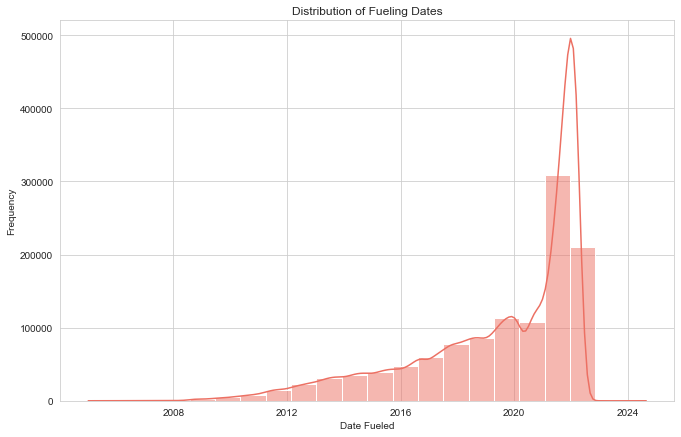

In [45]:
plt.figure(figsize=(11, 7))
sns.set_style('whitegrid')
sns.histplot(updated_df['date_fueled'].dropna(),
                bins='sturges',
                stat='count',
                kde=True,
                color='#ec7063')
plt.title('Distribution of Fueling Dates')
plt.xlabel('Date Fueled')
plt.ylabel('Frequency')
plt.savefig('./Plots/Plots[1.1-5]/fueling_dates_distribution.png')
plt.show()

The histogram shows the distribution of valid fueling dates within the specificed range (from 2005 to the current date). 
1. Distribution of Fueling Dates:
    * The data seems to be heavily skewed towards the more recent dates.
    * The KDE line peaks significantly towards the right-hand side of the plot, suggesting that most of the refueling entries occurred within a more condensed recent time period.

2. Historical Refueling Activity:
    * There is a gradual increase in the number of entries over time, with a sharp rise as you approach the more recent dates.
    * This could indicate that the dataset either has more recent entries or that vehicle refueling was recorded more frequently as time progressed.

3. Binning:
    * The histogram bins are wide enough to capture general trends, but there might be clustering towards specific time periods, which the KDE line emphasizes.

[1.2] Numeric Fields: 1. Identify what percentage of gallons, miles, and odometer entries are missing.

In [46]:
# Calculate the percentage of missing values in each of the specified columns
columns = ['gallons', 'miles', 'odometer']
percent_missing = updated_df[columns].isnull().mean() * 100

for column, percentage in percent_missing.items():
    print(f"Percentage of missing entries in '{column}': {percentage:.2f}%")

Percentage of missing entries in 'gallons': 6.33%
Percentage of missing entries in 'miles': 87.60%
Percentage of missing entries in 'odometer': 12.65%


[1.2] Numeric Fields: 2. The miles, gallons and mpg columns are interdependent. If one is missing, the other two can be used to calculate it.

In [47]:
# Convert odometer, gallons and miles to floats
updated_df['gallons'] = updated_df['gallons'].astype(str)
updated_df['gallons'] = updated_df['gallons'].str.replace(',', '').str.strip()
updated_df['gallons'] = pd.to_numeric(updated_df['gallons'], errors='coerce')

updated_df['miles'] = updated_df['miles'].astype(str)
updated_df['miles'] = updated_df['miles'].str.replace(',', '').str.strip()
updated_df['miles'] = pd.to_numeric(updated_df['miles'], errors='coerce')

updated_df['mpg'] = updated_df['mpg'].astype(str)
updated_df['mpg'] = updated_df['mpg'].str.replace(',', '').str.strip()
updated_df['mpg'] = pd.to_numeric(updated_df['mpg'], errors="coerce")

# Display the dataframe to check conversion and missing values
print(f'Conversion to float to check for conversion errors.')
display(updated_df[['gallons', 'miles', 'mpg']].head())

# Function to calculate missing values
def fill_missing_values(row):
    if pd.isnull(row['miles']) and pd.notnull(row['gallons']) and pd.notnull(row['mpg']):
        row['miles'] = row['gallons'] * row['mpg']
    elif pd.isnull(row['gallons']) and pd.notnull(row['miles']) and pd.notnull(row['mpg']):
        row['gallons'] = row['miles'] / row['mpg']
    elif pd.isnull(row['mpg']) and pd.notnull(row['miles']) and pd.notnull(row['gallons']):
        row['mpg'] = row['miles'] / row['gallons']
    return row

# Apply the function to each row in the DataFrame
updated_df = updated_df.apply(fill_missing_values, axis=1)

print(f'After applying missing values function.')
display(updated_df[['gallons','miles','mpg']].head())

Conversion to float to check for conversion errors.


,gallons,miles,mpg
0,NaN,NaN,NaN
1,12.120,NaN,31.6
2,7.991,NaN,28.5
3,10.575,NaN,46.8
4,11.651,244.4,21.0


After applying missing values function.


,gallons,miles,mpg
0,NaN,NaN,NaN
1,12.120,382.9920,31.6
2,7.991,227.7435,28.5
3,10.575,494.9100,46.8
4,11.651,244.4000,21.0


[1.2] Numeric Fields: 3. The values will be read in as objects (or strings) by Pandas. Convert these values to float (note the point above about commas in the value).

In [48]:
updated_df['odometer'] = updated_df['odometer'].astype(str)
updated_df['odometer'] = updated_df['odometer'].str.replace(',', '').str.strip()
updated_df['odometer'] = pd.to_numeric(updated_df['odometer'], errors='coerce')

# Function to clean and convert to float
def clean_and_convert(value):
    if pd.isna(value):
        return None
    # Remove commas
    value = value.replace(',', '')
    # Remove currency symbols
    value = re.sub(r'[^\d.]', '', value)
    try:
        return float(value)
    except ValueError:
        return None
    
# Apply the function to create new float columns
updated_df['cost_per_gallon_float'] = updated_df['cost_per_gallon'].apply(clean_and_convert)
updated_df['total_spent_float'] = updated_df['total_spent'].apply(clean_and_convert)

display(updated_df.head())

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,total_spent_float
0,2022-04-07,2022-04-07,73370.0,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,NaN,NaN
1,2012-11-07,2016-08-30,11983.0,12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150,5.599,67.86
2,2012-09-22,2012-09-28,98233.0,7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...,5.450,43.53
3,2019-05-04,2019-05-04,163802.0,10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233,5.110,54.00
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.0,244.4000,https://www.somewebsite.com/honda/passport/201...,3.029,35.29


[1.2] Numeric Fields: 4. Plot the distributions and comment on the distributions. 

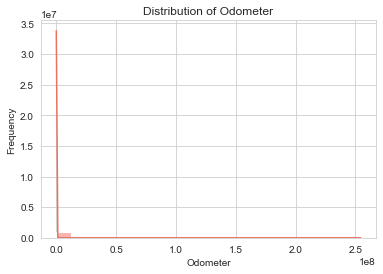

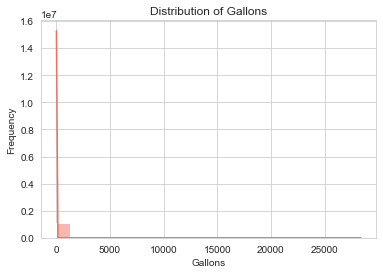

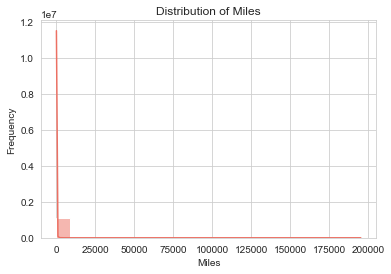

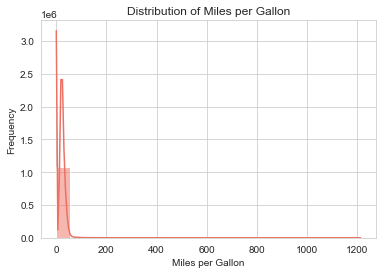

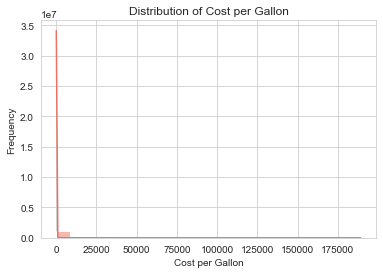

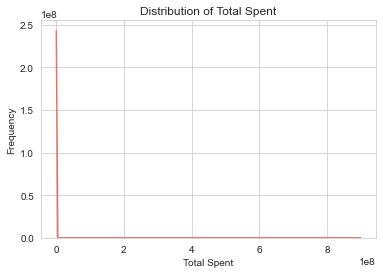

<Figure size 432x288 with 0 Axes>

In [49]:
import os

output_folder = './Plots/Plots[1.2-4]'

# Define the columns to plot along with their labels
columns = {
    'odometer': 'Odometer',
    'gallons': 'Gallons',
    'miles': 'Miles',
    'mpg': 'Miles per Gallon',
    'cost_per_gallon_float': 'Cost per Gallon',
    'total_spent_float': 'Total Spent'
}

# Loop through each column and generate the plots
for column, label in columns.items():
    sns.set_style('whitegrid')
    sns.histplot(updated_df[column].dropna(),
                 bins='sturges',
                 stat='count',
                 kde=True,
                 color='#ec7063')
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.ylabel('Frequency')

    plot_path = os.path.join(output_folder, f'{label.lower().replace(" ", "_")}_distribution.png')
    plt.savefig(plot_path)

    plt.show()

    plt.clf()

We are unable to make meaningful observations about these plots due to the lack of a clear distributions. This suggests the presence of significant outliers that obscure our data, making it difficult to draw conclusions. Given the diverse range of currencies involved, it was anticipated that interpreting `Total Spent` and `Cost per Gallon` would be challenging. So we are going to use a boxplot to help us see the outliers and where they should be removed.


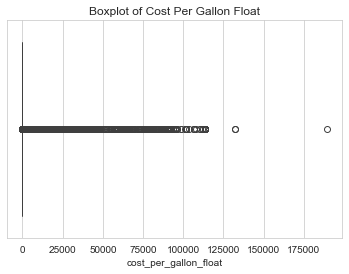

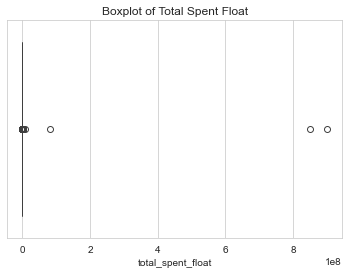

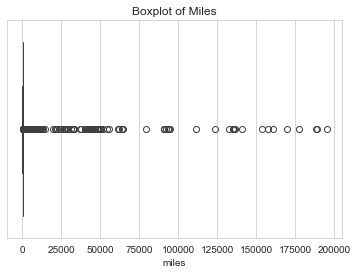

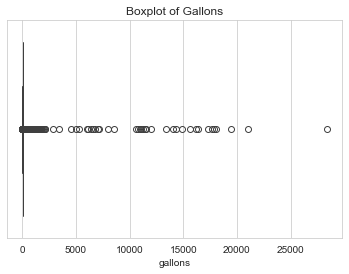

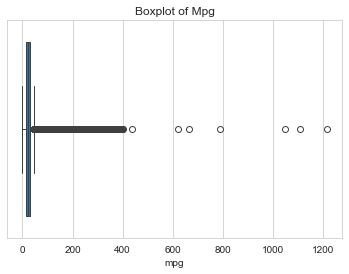

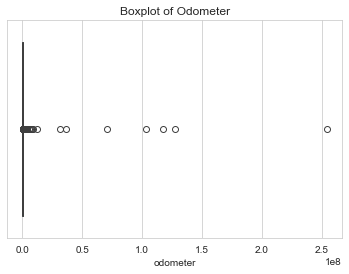

<Figure size 432x288 with 0 Axes>

In [50]:
output_folder = './Plots/Plots[1.2-4]'

# List of columns to plot
columns = ['cost_per_gallon_float', 'total_spent_float', 'miles', 'gallons', 'mpg', 'odometer']

# Loop through each column and generate a boxplot
for column in columns:
    sns.boxplot(x=updated_df[column])
    plt.title(f'Boxplot of {column.replace("_", " ").title()}')

    # Save the plot
    plot_path = os.path.join(output_folder, f'{column}_boxplot.png')
    plt.savefig(plot_path)

    plt.show()
    
    plt.clf()

After examining the boxplots, it is evident that there are significant outliers present in the data. These outliers skew the distributions, making it challenging to draw accurate and informed conclusions. Therefore, we filter out these extreme values using percentiles before conducting further analysis.

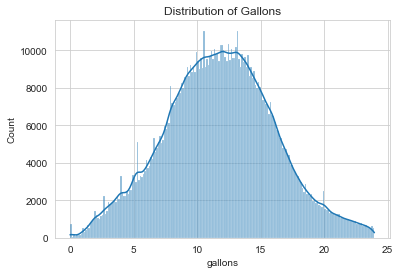

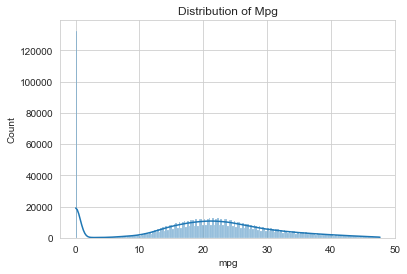

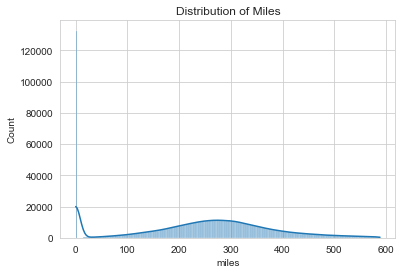

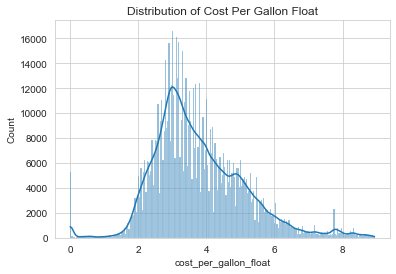

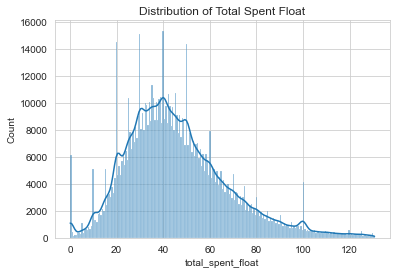

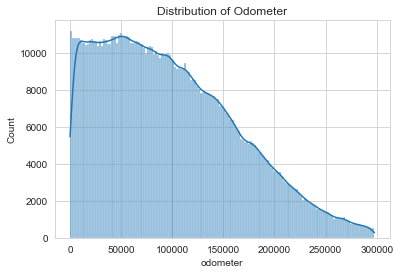

<Figure size 432x288 with 0 Axes>

In [56]:
output_folder = './Plots/Plots[1.2-4]'

numerical_na_removal_df = updated_df.dropna(subset=['gallons', 'mpg', 'miles', 'cost_per_gallon_float', 'total_spent_float', 'odometer'])

def remove_outliers_iqr(df_clean, column):
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    return df_clean[(df_clean[column] >= (Q1 - 1.5 * IQR)) & (df_clean[column] <= (Q3 + 1.5 * IQR))]

# List of columns to clean and plot
columns = ['gallons', 'mpg', 'miles', 'cost_per_gallon_float', 'total_spent_float', 'odometer']

# Clean each column and create a single DataFrame
cleaned_dfs = pd.DataFrame({column: remove_outliers_iqr(numerical_na_removal_df, column)[column] for column in columns})

# Function to plot and save the distribution
def plot_and_save_distribution(column, df_clean):
    sns.histplot(df_clean[column], kde=True)
    plt.title(f'Distribution of {column.replace("_", " ").title()}')

    plot_path = os.path.join(output_folder, f'{column}_cleaned_distribution.png')
    plt.savefig(plot_path)

    plt.show()
    plt.clf()

# Loop through each column and plot the cleaned data
for column in columns:
    plot_and_save_distribution(column, cleaned_dfs)

[1.2] Numeric Fields: 5. Compute the statistical description of the columns: mean, standard deviation, max, min, most frequent, and quartiles. Do these results make sense?

In [57]:
print(f'Summary statistics for data without outlier removal:')
pd.set_option('display.float_format', '{:.3f}'.format)
display(updated_df.describe())

print(f'Summary statistics for data with outlier removal:')
pd.set_option('display.float_format', '{:.3f}'.format)
display(cleaned_dfs.describe())

Summary statistics for data without outlier removal:


,odometer,gallons,mpg,miles,cost_per_gallon_float,total_spent_float
count,1024019.000,1098148.000,1098148.000,1098148.000,1089595.000,1096071.000
mean,104001.563,12.798,22.159,269.432,107.893,2751.330
std,340794.415,74.550,15.744,726.394,1682.881,1184991.295
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,45926.000,8.988,15.500,181.338,2.999,32.480
50%,91882.000,11.953,21.800,267.019,3.859,47.010
75%,146925.000,14.937,28.500,342.741,5.310,70.810
max,254362100.000,28380.000,1214.300,195321.200,189270.590,899647469.000


Summary statistics for data with outlier removal:


,gallons,mpg,miles,cost_per_gallon_float,total_spent_float,odometer
count,919955.000,922576.000,924051.000,801898.000,807771.000,932496.000
mean,11.805,20.314,244.014,3.773,45.978,98608.281
std,4.334,11.313,138.315,1.331,22.076,66345.356
min,0.000,0.000,0.000,0.000,0.000,0.000
25%,8.881,14.700,169.201,2.879,30.400,44288.000
50%,11.813,21.100,259.770,3.519,42.700,89440.000
75%,14.683,27.400,332.572,4.540,57.940,143385.250
max,23.961,47.700,588.588,8.940,130.700,297731.000


The summary statistics of the dataset reveal several significant data quality issues, making it challenging to draw accurate conclusions. Most notably, the presence of extremely high standard deviations and unrealistic maximum values across multiple columns suggests the presence of severe outliers and possible data entry errors. For instance, the `odometer` reading has a maximum value of 254 million miles, which is highly implausible, while the `gallons`, `mpg`, `miles`, `cost per gallon`, and `total spent` columns also exhibit similarly exaggerated maximum values. Additionally, minimum values of zero in several columns may indicate missing or misentered data. The monetary columns (such as `cost per gallon` and `total spent`) are particularly difficult to analyze due to the presence of over 100 different currencies in the dataset, which likely contributes to the extreme variability observed.

### Question 2: Feature Engineering

[2.1] 1. Create a new column with the currency.

In [60]:
# Define a regular expression pattern to match all characters until the first digit
currency_pattern = r'^([^\d]+)'

# Extract the currency symbols/abbreviations from the cost_per_gallon column
updated_df['currency'] = updated_df['cost_per_gallon'].str.extract(currency_pattern, expand=False).str.strip()

display(updated_df['currency'].value_counts())
updated_df.head()

$      738408
£       86154
€       58443
CA$     46249
R       36043
        ...  
CV$        11
KGS         9
L$          9
IQD         8
YR          4
Name: currency, Length: 121, dtype: int64

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,total_spent_float,currency
0,2022-04-07,2022-04-07,73370.000,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,NaN,NaN,NaN
1,2012-11-07,2016-08-30,11983.000,12.120,$5.599,$67.86,31.600,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,5.599,67.860,$
2,2012-09-22,2012-09-28,98233.000,7.991,£5.45,£43.53,28.500,227.743,https://www.somewebsite.com/mercedes-benz/e300...,5.450,43.530,£
3,2019-05-04,2019-05-04,163802.000,10.575,£5.11,£54.00,46.800,494.910,https://www.somewebsite.com/bmw/320d/2010/247233,5.110,54.000,£
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.000,244.400,https://www.somewebsite.com/honda/passport/201...,3.029,35.290,$


[2.1] 2. Create a new column containing the float value of the total spend and the cost per gallon.

In [61]:
# Calculate the total spend by multiplying the cost per gallon by the number of gallons
updated_df['total_spend'] = updated_df['cost_per_gallon_float'] * updated_df['gallons']

updated_df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,total_spent_float,currency,total_spend
0,2022-04-07,2022-04-07,73370.000,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,NaN,NaN,NaN,NaN
1,2012-11-07,2016-08-30,11983.000,12.120,$5.599,$67.86,31.600,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,5.599,67.860,$,67.860
2,2012-09-22,2012-09-28,98233.000,7.991,£5.45,£43.53,28.500,227.743,https://www.somewebsite.com/mercedes-benz/e300...,5.450,43.530,£,43.551
3,2019-05-04,2019-05-04,163802.000,10.575,£5.11,£54.00,46.800,494.910,https://www.somewebsite.com/bmw/320d/2010/247233,5.110,54.000,£,54.038
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.000,244.400,https://www.somewebsite.com/honda/passport/201...,3.029,35.290,$,35.291


[2.1] 3. Car make, model, year, User ID: use the url (the last value in the URL is
the user ID).

In [62]:
def extract_car_details(url):
    # Remove 'https://www.somewebsite.com/' and split by '/'
    parts = url.replace('https://www.somewebsite.com/', '').split('/')
    
    if len(parts) == 4:
        # do normally
        make = parts[0]
        model = parts[1]
        year = parts[2]
        user_id = parts[3]
    elif len(parts) == 3:
        # handle mispelled ones with out a model
        # make = parts[0]
        # can potentially be:
        make = "incorrect_make"
        # or
        # make = "other"
        model = "not applicable"
        year = parts[1]
        user_id = parts[2]
    elif len(parts) == 5:
        # handle ones that have extra "other" part 
        # ignore first other part
        make = parts[1]
        model = parts[2]
        year = parts[3]
        user_id = parts[4]

    
    return pd.Series([make, model, year, user_id])

# Apply the function to extract details and add new columns to the DataFrame
updated_df[['make', 'model', 'year', 'user_id']] = updated_df['user_url'].apply(extract_car_details)
updated_df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,total_spent_float,currency,total_spend,make,model,year,user_id
0,2022-04-07,2022-04-07,73370.000,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,NaN,NaN,NaN,NaN,suzuki,swift,2015,674857
1,2012-11-07,2016-08-30,11983.000,12.120,$5.599,$67.86,31.600,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,5.599,67.860,$,67.860,bmw,x3,2009,461150
2,2012-09-22,2012-09-28,98233.000,7.991,£5.45,£43.53,28.500,227.743,https://www.somewebsite.com/mercedes-benz/e300...,5.450,43.530,£,43.551,mercedes-benz,e300,1998,133501
3,2019-05-04,2019-05-04,163802.000,10.575,£5.11,£54.00,46.800,494.910,https://www.somewebsite.com/bmw/320d/2010/247233,5.110,54.000,£,54.038,bmw,320d,2010,247233
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.000,244.400,https://www.somewebsite.com/honda/passport/201...,3.029,35.290,$,35.291,honda,passport,2019,1038865


[2.2] 1. litres filled: use the gallons - consider whether to use UK or US gallons.
* Objective: The objective of this code section is to determine the predominant currency type in the dataset and use it to convert fuel quantities from gallons to liters.

* Steps:
    1. Determine Currency Type:
        * A function determine_currency_type is defined to classify the currency into `US`, `UK`, or `Other` based on the currency symbol.
        * This function is applied to the currency column of the DataFrame `updated_df` to create a new column `currency_type`.
    2. Count Currency Occurrences:
        * The occurrences of each currency type are counted using the `value_counts` method on the `currency_type` column.
    3. Identify Predominant Currency:
        * The predominant currency is determined by comparing the counts of `US` and `UK` currencies. If `US` has more occurrences, it is set as the predominant currency; otherwise, `UK` is chosen.
    4. Set Conversion Factor:
        * Based on the predominant currency, a conversion factor is set:
            - For `US`, the conversion factor is 3.78541 (US gallons to liters).
            - For `UK`, the conversion factor is 4.54609 (UK gallons to liters).
    5. Convert Gallons to Liters:
        * A function `convert_gallons_to_litres` is defined to convert gallons to liters using the determined conversion factor.
        * This function is applied to the `gallons` column to create a new column `litres_filled`.

In [63]:
# Function to determine the currency type
def determine_currency_type(currency):
    if '$' == currency:
        return 'US'
    elif '£' == currency:
        return 'UK'
    else:
        return 'Other'
    
# Apply the function to determine currency type
updated_df['currency_type'] = updated_df['currency'].apply(determine_currency_type)

# Count the occurrences of each currency type
currency_counts = updated_df['currency_type'].value_counts()

# Determine the predominant currency
predominant_currency = 'US' if currency_counts.get('US', 0) > currency_counts.get('UK', 0) else 'UK'

# Conversion factor based on the predominant currency
if predominant_currency == 'US':
    conversion_factor = 3.78541  # US gallon to liters
    print(f'Using US gallon to litre conversion factor: {conversion_factor}')
else:
    conversion_factor = 4.54609  # UK gallon to liters
    print(f'Using UK gallon to litre conversion factor: {conversion_factor}')

# Function to convert gallons to liters
def convert_gallons_to_litres(gallons):
    if pd.isna(gallons):
        return None
    return gallons * conversion_factor

# Apply the conversion to create a new 'liters_filled' column
updated_df['litres_filled'] = updated_df['gallons'].apply(convert_gallons_to_litres)

updated_df.head()

Using US gallon to litre conversion factor: 3.78541


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,total_spent_float,currency,total_spend,make,model,year,user_id,currency_type,litres_filled
0,2022-04-07,2022-04-07,73370.000,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,NaN,NaN,NaN,NaN,suzuki,swift,2015,674857,Other,NaN
1,2012-11-07,2016-08-30,11983.000,12.120,$5.599,$67.86,31.600,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,5.599,67.860,$,67.860,bmw,x3,2009,461150,US,45.879
2,2012-09-22,2012-09-28,98233.000,7.991,£5.45,£43.53,28.500,227.743,https://www.somewebsite.com/mercedes-benz/e300...,5.450,43.530,£,43.551,mercedes-benz,e300,1998,133501,UK,30.249
3,2019-05-04,2019-05-04,163802.000,10.575,£5.11,£54.00,46.800,494.910,https://www.somewebsite.com/bmw/320d/2010/247233,5.110,54.000,£,54.038,bmw,320d,2010,247233,UK,40.031
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.000,244.400,https://www.somewebsite.com/honda/passport/201...,3.029,35.290,$,35.291,honda,passport,2019,1038865,US,44.104


[2.2] 2. km driven: use the miles driven to compute this.

In [64]:
# Function to convert miles to kilometers
def miles_to_km(miles):
    if pd.isna(miles):
        return None
    return miles * 1.60934  # Convert miles to kilometers

# Apply the function to create a new 'km_driven' column
updated_df['km_driven'] = updated_df['miles'].apply(miles_to_km)

updated_df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,total_spent_float,currency,total_spend,make,model,year,user_id,currency_type,litres_filled,km_driven
0,2022-04-07,2022-04-07,73370.000,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,NaN,NaN,NaN,NaN,suzuki,swift,2015,674857,Other,NaN,NaN
1,2012-11-07,2016-08-30,11983.000,12.120,$5.599,$67.86,31.600,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,5.599,67.860,$,67.860,bmw,x3,2009,461150,US,45.879,616.364
2,2012-09-22,2012-09-28,98233.000,7.991,£5.45,£43.53,28.500,227.743,https://www.somewebsite.com/mercedes-benz/e300...,5.450,43.530,£,43.551,mercedes-benz,e300,1998,133501,UK,30.249,366.517
3,2019-05-04,2019-05-04,163802.000,10.575,£5.11,£54.00,46.800,494.910,https://www.somewebsite.com/bmw/320d/2010/247233,5.110,54.000,£,54.038,bmw,320d,2010,247233,UK,40.031,796.478
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.000,244.400,https://www.somewebsite.com/honda/passport/201...,3.029,35.290,$,35.291,honda,passport,2019,1038865,US,44.104,393.323


[2.2] 3. litres per 100km: use the two new features to calculate this.

In [66]:
# Function to calculate liters per 100 kilometers
def calculate_litres_per_100km(liters, km):
    if pd.isna(liters) or pd.isna(km) or km == 0:
        return None
    return (liters / km) * 100

# Apply the function to create a new 'liters_per_100km' column
updated_df['litres_per_100km'] = updated_df.apply(lambda row: calculate_litres_per_100km(row['litres_filled'], row['km_driven']), axis=1)

updated_df.head()

,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url,cost_per_gallon_float,...,currency,total_spend,make,model,year,user_id,currency_type,litres_filled,km_driven,litres_per_100km
0,2022-04-07,2022-04-07,73370.000,NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...,NaN,...,NaN,NaN,suzuki,swift,2015,674857,Other,NaN,NaN,NaN
1,2012-11-07,2016-08-30,11983.000,12.120,$5.599,$67.86,31.600,382.992,https://www.somewebsite.com/bmw/x3/2009/461150,5.599,...,$,67.860,bmw,x3,2009,461150,US,45.879,616.364,7.444
2,2012-09-22,2012-09-28,98233.000,7.991,£5.45,£43.53,28.500,227.743,https://www.somewebsite.com/mercedes-benz/e300...,5.450,...,£,43.551,mercedes-benz,e300,1998,133501,UK,30.249,366.517,8.253
3,2019-05-04,2019-05-04,163802.000,10.575,£5.11,£54.00,46.800,494.910,https://www.somewebsite.com/bmw/320d/2010/247233,5.110,...,£,54.038,bmw,320d,2010,247233,UK,40.031,796.478,5.026
4,2022-02-15,2022-02-15,NaN,11.651,$3.029,$35.29,21.000,244.400,https://www.somewebsite.com/honda/passport/201...,3.029,...,$,35.291,honda,passport,2019,1038865,US,44.104,393.323,11.213


### Question 3: Vehicle Exploration

[3.1] Plot the number of unique users per country (remember, we proxy this by
currency).